In [26]:
import numpy as np


Define the sigmoid activation function and its derivative

In [27]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

Define XOR dataset

In [28]:
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
outputs = np.array([[0],[1],[1],[0]])

np.random.seed(100)

Initialize weights randomly with mean 0

In [29]:
input_size = 2
hidden_size = 4
output_size = 1

weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))

Hyperparameters

In [30]:
learning_rate = 0.1
epochs = 10000

Training loop

In [31]:
for epoch in range(epochs):
    #forward propagation
    hidden_layer_input = np.dot(inputs, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    predicted_output = sigmoid(output_layer_input)

    #calculate error
    error = outputs - predicted_output

    #backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output) 

    #Update Weights
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    weights_input_hidden += inputs.T.dot(d_hidden_layer) * learning_rate


In [32]:
#test the trained network
test_input = np.array([[0,0],[0,1],[1,0],[1,1]])
test_output = sigmoid(np.dot(sigmoid(np.dot(test_input, weights_input_hidden)), weights_hidden_output))

print("Predicted XOR Outputs:")
print(test_output)

Predicted XOR Outputs:
[[0.09198199]
 [0.91346943]
 [0.92084067]
 [0.08962728]]


In [33]:
import gym
env = gym.make("CartPole-v1")
observation, info = env.reset(seed=42)

for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()
env.close()

C:\Users\Aarya Gupta\AppData\Roaming\Python\Python311\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


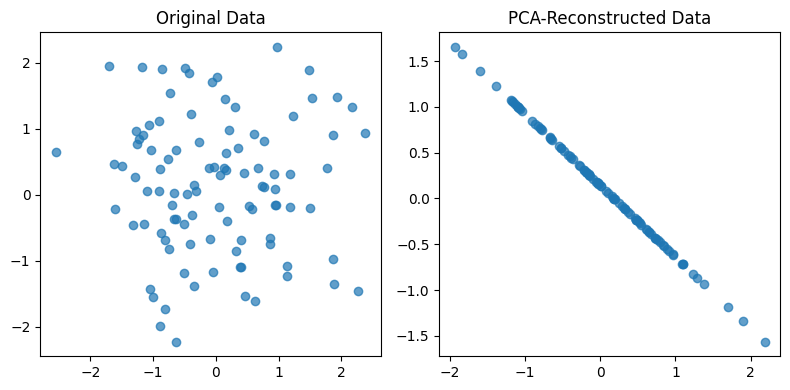

In [40]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#create a sample dataset
np.random.seed(0)
n_samples = 100
n_features = 2
X = np.random.randn(n_samples, n_features)

#initialize PCA with the desired number of components 
n_components = 1
pca = PCA(n_components=n_components)

#fit PCA on the data and transform it
X_pca = pca.fit_transform(X)

#Inverse transform to get the projected data back into the original space
X_original = pca.inverse_transform(X_pca)

#plot the original data and the PCA reconstructed data
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:,0],X[:,1],alpha=0.7)
plt.title('Original Data')

plt.subplot(1,2,2)
plt.scatter(X_original[:,0], X_original[:,1],alpha=0.7)
plt.title('PCA-Reconstructed Data')

plt.tight_layout()
plt.show()

In [ ]:
_